The data set on which the linear regression model has to be implemented is : 
   YearsExperience     Salary
0              8.1   77884.67
1             19.1  127213.68
2             14.9  103343.52
3             12.4   88988.96
4              4.0   35214.78



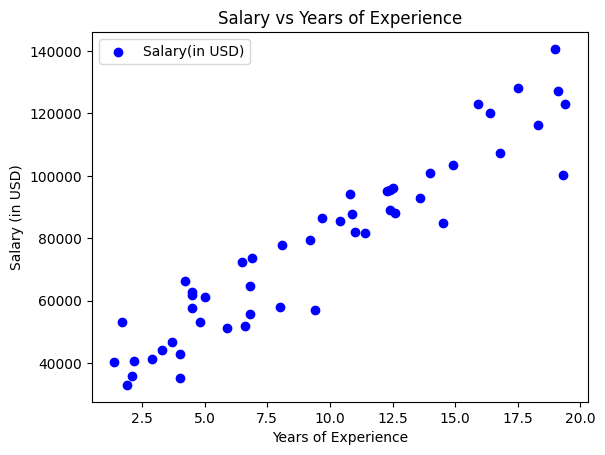

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# importing the csv file on which the linear regression model has to be implemented
extended_salary = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/extended_salary_data.csv')
print("The data set on which the linear regression model has to be implemented is : ")
print(extended_salary.head())
print()

# Visualizing the dataset using a scatterplot
plt.scatter(extended_salary['YearsExperience'],extended_salary['Salary'],color = 'b',label = 'Salary(in USD)')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in USD)')
plt.legend()
plt.show()
print()

In [ ]:
# Computing mean,median and variance
mean_y = np.mean(extended_salary['YearsExperience'])
medain_y = np.median(extended_salary['YearsExperience'])
variance_y = np.var(extended_salary['YearsExperience'])

mean_s = np.mean(extended_salary['Salary'])
medain_s = np.median(extended_salary['Salary'])
variance_s = np.var(extended_salary['Salary'])

statistics_table = pd.DataFrame({
    "Statistics" : ["Mean","Median","Variance"],
    "Years of Experience" : [mean_y,medain_y,variance_y],
    "Salary" : [mean_s,medain_s,variance_s]
})
print("The mean,median and variance for the various statistics is : ")
print()
print(statistics_table)
print()



The mean,median and variance for the various statistics is : 

  Statistics  Years of Experience        Salary
0       Mean               9.4800  7.737055e+04
1     Median               9.3000  7.859865e+04
2   Variance              29.4888  7.848125e+08



The R2 square value for the above data frame is : 
0.9183471435855177
The slope for the lr model is  [[4626.93007128]]  and the intercept is  [32720.20256264]
The mean absolute error is 7678.472125383401  and the mean squared error is  91704131.37932877



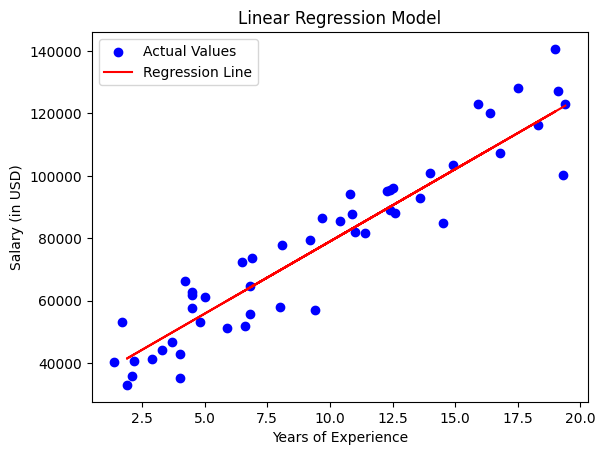

In [ ]:
# Building the linear regression model

x = extended_salary['YearsExperience']
y = extended_salary['Salary']

# Using Train_test_split function to distribute data for training and splitiing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 80)

# converting the trained and tested arrays into 2-D arrays as required by Linear Regression Model
x_train = x_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

# Creating a linear regression and fitting the data
lin_red = linear_model.LinearRegression()
lin_red.fit(x_train,y_train)

print("The R2 square value for the above data frame is : ")
print(lin_red.score(x_test, y_test))

print("The slope for the lr model is ",lin_red.coef_," and the intercept is ",lin_red.intercept_)

# Using the model to make predictions on training set
y_predicted = lin_red.predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_predicted,y_test)
mse = mean_squared_error(y_predicted,y_test)
print("The mean absolute error is",mae," and the mean squared error is ",mse)
print()

# printing the scatterplot

plt.scatter(extended_salary['YearsExperience'],extended_salary['Salary'],color = 'b',label = 'Actual Values')
plt.plot(x_test,y_predicted,color = 'r',label = 'Regression Line')
plt.title('Linear Regression Model')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in USD)')
plt.legend()
plt.show()

In [ ]:
# Bonus Task

extended_salary['NumProjectsCompleted'] = (2 * extended_salary['YearsExperience'] + np.random.randint(1,100,size=extended_salary.shape[0])).round()
print("The new dataset after the addition of number of projects completed is ")
print(extended_salary.head())
print()

# Training the model using both features
x = extended_salary[['NumProjectsCompleted','YearsExperience']]
y = extended_salary['Salary']

x_train_n,x_test_n,y_train_n,y_test_n = train_test_split(x,y,test_size = 0.2,random_state = 80)

multiple_lin_reg = linear_model.LinearRegression()
multiple_lin_reg.fit(x_train_n,y_train_n)

print("The R2 square value for the multiple linear regression model is : ",multiple_lin_reg.score(x_test_n,y_test_n))
y_pred_mul = multiple_lin_reg.predict(x_test_n)

# Calculating the MAE,MSE
mae = mean_absolute_error(y_pred_mul,y_test_n)
mse = mean_squared_error(y_pred_mul,y_test_n)
print("The mean absolute error is",mae," and the mean squared error is ",mse)
print("The slopes for the new data set is", multiple_lin_reg.coef_," and the intercept is ",multiple_lin_reg.intercept_)


The new dataset after the addition of number of projects completed is 
   YearsExperience     Salary  NumProjectsCompleted
0              8.1   77884.67                  84.0
1             19.1  127213.68                  58.0
2             14.9  103343.52                 117.0
3             12.4   88988.96                 106.0
4              4.0   35214.78                  17.0

The R2 square value for the multiple linear regression model is :  0.9253894252321944
The mean absolute error is 7489.579104641986  and the mean squared error is  83794961.39195123
The slopes for the new data set is [  50.97971864 4490.40732317]  and the intercept is  30667.5115300834
